In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.4
numpy 1.19.5
pandas 1.1.5
sklearn 0.24.2
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [3]:
from sklearn import datasets
import tarfile
data_home = datasets.get_data_home()
archive_path = os.path.join(data_home, 'cal_housing.tgz')
with tarfile.open(mode="r:gz", name=archive_path) as f:
     cal_housing = np.loadtxt(
         f.extractfile("CaliforniaHousing/cal_housing.data"), delimiter=","
     )
     # Columns are not in the same order compared to the previous
     # URL resource on lib.stat.cmu.edu
     columns_index = [8, 7, 2, 3, 4, 5, 6, 1, 0]
     cal_housing = cal_housing[:, columns_index]
       
feature_names = [
    "MedInc",
    "HouseAge",
    "AveRooms",
    "AveBedrms",
    "Population",
    "AveOccup",
    "Latitude",
    "Longitude",
]

target, data = cal_housing[:, 0], cal_housing[:, 1:]

# avg rooms = total rooms / households
data[:, 2] /= data[:, 5]

# avg bed rooms = total bed rooms / households
data[:, 3] /= data[:, 5]

# avg occupancy = population / households
data[:, 5] = data[:, 4] / data[:, 5]

# target in units of 100,000
target = target / 100000.0


In [5]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    data,target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [7]:
print(x_train.shape[1:])

(8,)


In [8]:
#这部分在搭建deep模型
# 函数式API 功能API,和之前不一样
input = keras.layers.Input(shape=x_train.shape[1:])
print(input)
#input作为输入
hidden1 = keras.layers.Dense(30, activation='relu')(input)
#hidden1作为输入
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
# 复合函数: f(x) = h(g(x))

#假设wide模型和deep模型的输入是一样的，wide是input，deep是hidden2对吗？
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)

#然后定义model，放入input，output
model = keras.models.Model(inputs = [input],
                           outputs = [output])

model.summary()
model.compile(loss="mean_squared_error",
              optimizer = keras.optimizers.SGD(0.001))
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]

Tensor("input_1:0", shape=(None, 8), dtype=float32)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                          

In [9]:
model.layers

In [10]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.9644 - val_loss: 0.9328
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6909 - val_loss: 0.7194
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6326 - val_loss: 0.6761
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6012 - val_loss: 0.6415
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5703 - val_loss: 0.6095
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5473 - val_loss: 0.5843
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5312 - val_loss: 0.5627
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5123 - val_loss: 0.5439
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4973 - val_loss: 0.5288
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4860 - val_lo

363/363 [==============================] - 1s 3ms/step - loss: 0.3485 - val_loss: 0.3630
Epoch 82/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3478 - val_loss: 0.3621
Epoch 83/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3472 - val_loss: 0.3626
Epoch 84/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3467 - val_loss: 0.3607
Epoch 85/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3461 - val_loss: 0.3615
Epoch 86/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3453 - val_loss: 0.3616
Epoch 87/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3456 - val_loss: 0.3598
Epoch 88/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3444 - val_loss: 0.3602
Epoch 89/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3441 - val_loss: 0.3588
Epoch 90/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3439 - val_loss: 

In [11]:
print(history.history)

{'loss': [1.9644464254379272, 0.6908806562423706, 0.632645308971405, 0.6012195944786072, 0.5702834129333496, 0.5473093390464783, 0.5311700701713562, 0.5123032331466675, 0.4973481297492981, 0.486015647649765, 0.4786088764667511, 0.4680505096912384, 0.4623221755027771, 0.4532012939453125, 0.44928622245788574, 0.44419142603874207, 0.4398549497127533, 0.435501366853714, 0.4306502342224121, 0.42718642950057983, 0.42435190081596375, 0.42134639620780945, 0.41823774576187134, 0.4155751168727875, 0.41253024339675903, 0.4107552766799927, 0.4076864421367645, 0.40625, 0.4039829969406128, 0.4017227292060852, 0.4002068042755127, 0.39812761545181274, 0.3963676393032074, 0.3952043354511261, 0.3930763304233551, 0.3915599584579468, 0.3901793658733368, 0.38842159509658813, 0.3872254192829132, 0.3854489326477051, 0.38418763875961304, 0.3824331760406494, 0.381507933139801, 0.37970423698425293, 0.3790353536605835, 0.3778006136417389, 0.3767005205154419, 0.3751404285430908, 0.3738913834095001, 0.373533338308

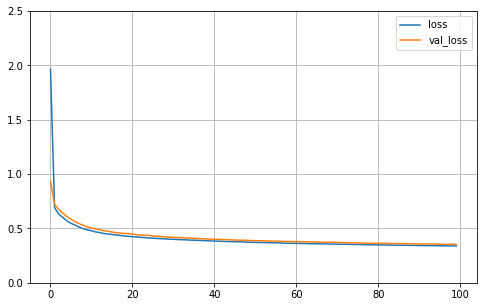

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2.5)
    plt.show()
plot_learning_curves(history)

In [13]:
#不是这个模型不好，而是搭建的比较简单
model.evaluate(x_test_scaled, y_test, verbose=0)

0.360502153635025